<a href="https://colab.research.google.com/github/CodeHunterOfficial/Data-Mining/blob/main/02.LinearModels.Classification/Lecture_2_1_Classification_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

На предыдущем занятии был изучен алгоритм линейной регрессии. Возникает вопрос: как можно получить алгоритм классификации из алгоритма регрессии? Для этого предлагается следующий подход. Предположим, имеется одномерный набор данных на входе. Этот набор можно разделить на интервалы и присвоить классы элементам выборки в зависимости от интервала, к которому они относятся. Например, если элемент принадлежит к классу 1, мы можем предсказывать значение в интервале от 0 до 1, для класса 2 - от 1 до 2 и так далее. Однако такой подход может столкнуться с определенными проблемами, поскольку регрессия редко допускает ошибки при смешении классов. Поэтому важно сохранить структуру ошибок для эффективной классификации. Сохранение этой логики и структуры ошибок является ключевым аспектом при разработке алгоритма классификации. Возможно, стоит рассмотреть альтернативные подходы для решения данной задачи.

Предположим, что мы обучаем $K$ линейных регрессий, где каждая из них отвечает за уверенность в принадлежности к определенному классу. Например, первая линейная регрессия может оценивать уверенность в принадлежности к классу 1, вторая - к классу 2 и так далее до $k$-го класса.

Таким образом, каждая регрессия представляет собой "карту" уверенности классификации. Может возникнуть вопрос о методах обучения таких регрессий и их регулировании, однако данная тема будет рассмотрена более подробно позднее. Важно отметить, что на первый взгляд такой подход выглядит перспективным, поскольку линейные регрессии могут выдавать значения в широком диапазоне от минус бесконечности до плюс бесконечности. После определения выходов линейных регрессий, обозначим их как $Z (z_1, z_2, …, z_k)$ и продолжим анализ.

Таким образом, путем обучения k линейных регрессий для каждого класса мы можем получить уверенности в принадлежности объектов к определенным классам. Далее, используя эти уверенности, можно принять решение о классификации объекта в соответствии с тем классом, для которого уверенность оказалась наивысшей. Этот подход позволяет эффективно преобразовать алгоритм регрессии в алгоритм классификации, сохраняя при этом структуру ошибок и логику предсказаний. Важно отметить, что такой метод требует тщательной настройки параметров и выбора оптимального числа линейных регрессий для достижения наилучших результатов в задаче классификации.

Если $Z_k > Z_i$ для любого $i \neq k$, то это означает, что объект принадлежит классу $k$: $y(\textbf{x}, \textbf{w}) = k$. Однако, следуя этому пути без дополнительных уточнений, возможно столкнуться с определенными проблемами. Рассмотрим их. Во-первых, в настоящее время отсутствует явный механизм для выражения уверенности в ответе нашего алгоритма. Желательно иметь вероятностный вектор, где все компоненты суммируются до единицы, а каждая компонента находится в диапазоне от 0 до 1, что можно интерпретировать как вектор вероятностей. Это первый аспект.

Однако существует и другой аспект. При продолжении данного подхода, независимо от настройки целевой функции, ее производная будет равна нулю во всех точках, где она определена по параметрам модели:
 $$\frac{\partial L}{\partial w} = 0$$.
 Это означает, что микроскопические изменения в обучаемых параметрах не будут влиять на значение целевой функции, что затрудняет оптимизацию такого алгоритма с использованием градиентного спуска. Целевая функция должна быть сформулирована таким образом, чтобы избежать нулевых частных производных. Решение этой проблемы представляет собой ключевой аспект в оптимизации алгоритма.

Давайте перепишем формулы для $Z_i$ как в случае линейной регрессии:

$$Z_1 = w_{10} + w_{11}x_1 + w_{12}x_2 + \ldots + w_{1M}x_M=\sum_{j=1}^{M} w_{1j}x_j + w_{10}=b_1+\vec{w}_1^T\vec{x}$$
$$Z_2 = w_{20} + w_{21}x_1 + w_{22}x_2 + \ldots + w_{2M}x_M = \sum_{j=1}^{M} w_{2j}x_j + w_{20} =b_2+\vec{w}_2^T\vec{x} $$

$$Z_3 = w_{30} + w_{31}x_1 + w_{32}x_2 + \ldots + w_{3M}x_M = \sum_{j=1}^{M} w_{3j}x_j + w_{30} =b_3+\vec{w}_3^T\vec{x} $$
$$…$$
$$Z_K = w_{K0} + w_{K1}x_1 + w_{K2}x_2 + \ldots + w_{KM}x_M = \sum_{j=1}^{M} w_{Kj}x_j + w_{K0} =b_K+\vec{w}_K^T\vec{x}$$

где $M$ - количество признаков, $w_{Kj}$ - весовой коэффициент для признака $x_j$ в классе $K$, $w_{K0}$ - смещение для класса $K$.


Из-за $\vec{w}_i^T$ создадим матрицу $W$:

$$ W =
\begin{bmatrix}
\vec{w}_1^T \\
\vec{w}_2^T \\
\vdots \\
\vec{w}_K^T
\end{bmatrix} =
\begin{bmatrix}
w_{10} & w_{11} & w_{12} & \ldots & w_{1M} \\
w_{20} & w_{21} & w_{22} & \ldots & w_{2M} \\
w_{30} & w_{31} & w_{32} & \ldots & w_{3M} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
w_{K0} & w_{K1} & w_{K2} & \ldots & w_{KM}
\end{bmatrix} $$

В логистической регрессии матрица $W$ используется для хранения весовых коэффициентов модели. Векторы-строки $\vec{w}_i^T$ представляют собой веса, которые модель присваивает каждому признаку $x_i$ во входных данных. Каждая строка матрицы $W$ соответствует весам для одного из классов в задаче классификации.

При обучении логистической регрессии происходит настройка весов $W$ с помощью метода градиентного спуска или других оптимизационных алгоритмов, чтобы минимизировать ошибку модели на обучающем наборе данных и достичь лучшей классификации.

Аналогичным образом создадим вектор базисов:
$$\vec{b} = \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_k \end{bmatrix}=(b_1, b_2, \cdot \cdot \cdot ,b_k)^T$$

В данном случае, вектор базисов \(b\) представляет собой вектор-столбец, содержащий базисы $b_1, b_2, \ldots, b_k$.


Построим вектор выходных значений $z:$

$$\vec{z} = \begin{bmatrix} Z_1 \\ Z_2 \\ \vdots \\ Z_k \end{bmatrix}=(Z_1, Z_2, \cdot \cdot \cdot ,Z_k)^T$$

и перепишем общее уравнение:

$$\vec{z}=W\cdot \vec{x}+\vec{b}$$

Где:
- $\vec{z}$ - вектор выходных значений,
- $W$ - матрица весов,
- $\vec{x}$ - вектор входных признаков,
- $\vec{b}$ - вектор базисов.





Наш алгоритм не способен обеспечить уверенность в ответе, поскольку он не учитывает зависимость целевой функции от класса. В данном случае частные производные по обучаемым параметрам всегда равны нулю, что делает алгоритм необучаемым с использованием градиентного спуска.

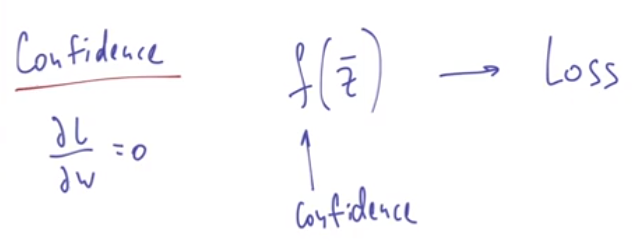

Решение проблемы заключается во введении функции $f(\vec{z})$, описывающей уверенность, которая затем передается в целевую функцию для вычисления потерь (Loss). Это позволит получить оценку уверенности для алгоритма и решить первую проблему. Для второй проблемы, при незначительном изменении обучаемых параметров, уверенность в классе может измениться, что требует зависимости целевой функции от уверенности, а не только от предсказываемого класса. Необходимо разработать функцию $f(\vec{z})$, которая описывает уверенность в предсказании на основе вектора $z$, чтобы обеспечить успешное обучение системы. Требования к этой функции должны быть тщательно продуманы для ее эффективного использования в данном контексте.

Обратим внимание, что данная функция представляет собой векторную функцию, возвращающую вектор, а не скалярное значение. Этот вектор фактически будет категориальным, представляя уверенность в ответе для каждого класса, точнее вероятность принадлежности объекта к каждому из классов из общего числа классов.

Первое требование заключается в том, что компоненты этой функции должны быть интерпретируемы как уверенности или вероятности принадлежности. Следовательно, все компоненты должны быть неотрицательными. Второе требование состоит в том, чтобы сумма всех компонент не равнялась единице.

Третье требование связано с тем, что если $z_i$ больше, чем $z_j$ (точнее, если $z_i$ больше, чем все остальные компоненты вектора $z$, то вероятно это класс $i$. Мы желаем, чтобы при этом $f_i$ было больше, чем $f_j$, что означает, что наш алгоритм предсказывает класс $i$.

Четвертое требование касается частных производных $f_i$ по параметрам. Суть заключается в том, что градиент не должен быть нулевым вектором.


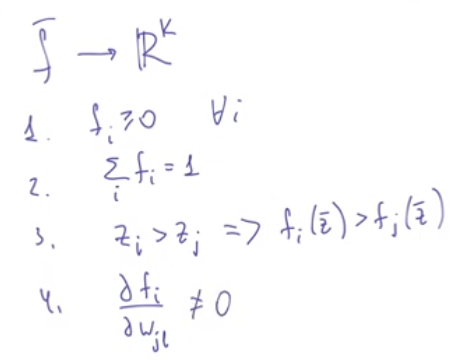


Таким образом, первые три свойства решают проблемы с уверенностями, а четвертое свойство решает проблему с градиентом. Найдем функцию, удовлетворяющую этим требованиям. Решение этой задачи заключается в использовании функции Softmax. Эта функция широко применяется в нейронных сетях для задач классификации.

В нашем распоряжении имеется входной вектор $z$ и функция Softmax, которая также представляет собой вектор, где каждая компонента является экспонентой в степени соответствующего элемента вектора $z$, деленной на сумму экспонент всех элементов вектора $z$.

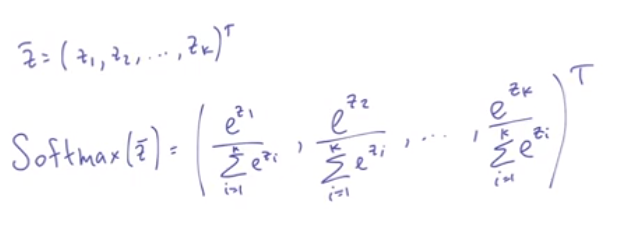

Давайте убедимся, что функция удовлетворяет всем требованиям, которые нас интересуют. Первое требование заключается в том, что все компоненты этой функции должны быть неотрицательными.

Рассмотрим компоненты функции, представленные экспонентами вещественных степеней. Экспонента вещественного числа всегда неотрицательна. Следовательно, знаменатель также неотрицателен, поскольку является суммой экспонент вещественных степеней. Числитель также неотрицателен, так как представляет собой экспоненту вещественной степени. Таким образом, первое требование выполнено: все компоненты неотрицательны.

Второе требование состоит в том, чтобы сумма компонент равнялась единице. Если просуммировать все компоненты, знаменатель останется неизменным, а числитель будет представлять собой сумму экспонент вещественных степеней. Поскольку знаменатель остается прежним, а числитель представляет собой сумму экспонент, то сумма всех компонент даст единицу. Таким образом, второе требование также выполняется.

Третье требование - если $z_i > z_j$, то $f_i > f_j$. Для компонент Softmax функции это означает, что если $z_i$ больше, чем все остальные $z_j$, то $f_i$ должно быть больше, чем все остальные $f_j$ (Смотрите график экспонента). Рассмотрим экспоненту в степени $z_i$ деленную на сумму экспонент. Если $z_i$ больше, чем $z_j$, то соответствующий числитель будет больше. Поэтому компонента функции будет больше, чем другие компоненты. Следовательно, третье требование также выполняется.


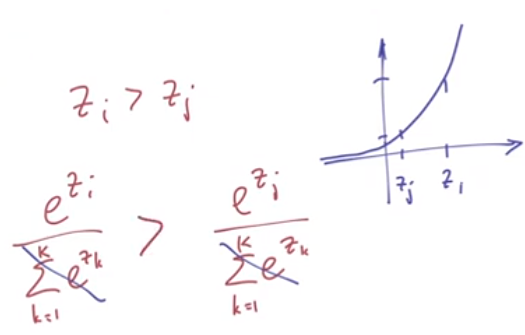

Последнее требование - частные производные любой компоненты по любому из обучаемых параметров не должны равняться нулю.

4.


$$\frac{\partial f_i}{\partial w_{kl}}=\frac{\partial (\frac{e^{z_i}}{\sum_{j=1}^{M}e^{z_j}})}{\partial w_{kl}}=\frac{\partial f_i}{\partial z_{k}} \cdot \frac{\partial z_k}{\partial w_{kl}}=\frac{\partial f_i}{\partial z_{k}} \cdot x_l$$

Чтобы производная всегда была равна нулю, необходимо, чтобы $\frac{\partial f_i}{\partial z_k}$ было равно нулю, так как $x_l$ не равно нулю.


Стоить отметить, что у нас есть два варинат:


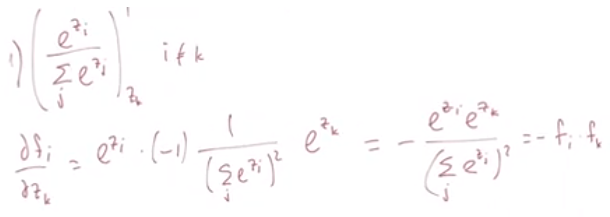

Известно, что $f_i$ и $f_k$ не равны нулю. Поэтому условие 4 выполняется в случае, когда $i \neq k$.

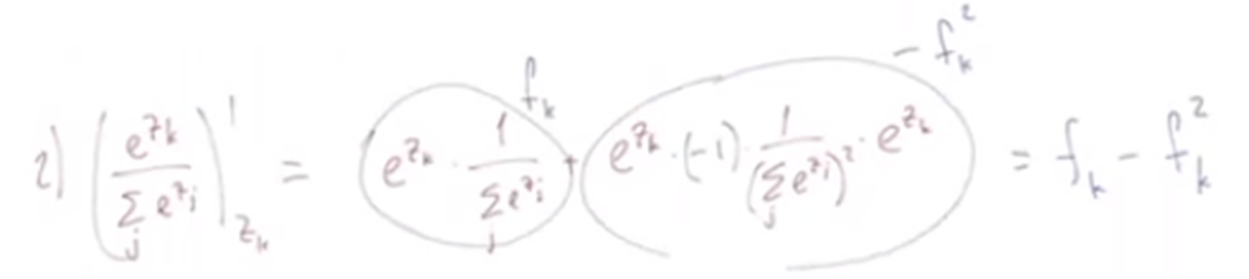

Мы воспользовались правилом $(f \cdot g)' = f' \cdot g + f \cdot g'$, где $f = e^{z_k}$ и $g = \frac{1}{\sum_{j}^{M} e^{z_j}}$.

Здесь тоже $f_k$ и  $f_k^2$ не равны нулю. Поэтому условие 4 выполняется тоже в случае, когда $i = k$.

Алгоритм логистической регрессии, который мы рассматриваем, представляет собой функцию Softmax от $W$ на $\vec{x}$, с добавлением $\vec{b}$.

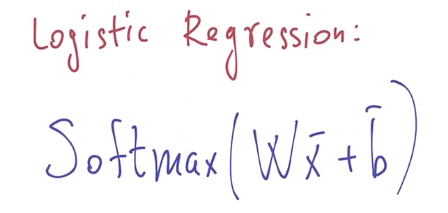

Вот у нас получиломь:

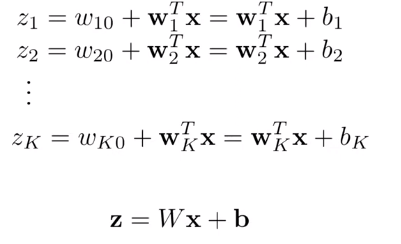

 Это представляет собой логистическую регрессию, где важным вопросом является выбор целевой функции для обучения модели. Мы сосредоточены на минимизации этой функции, что является основной целью. Теперь у нас есть уверенности, возвращаемые функцией Softmax, представляющие собой вектор с неотрицательными компонентами, сумма которых равна единице. Мы можем интерпретировать это как вектор вероятностей, по крайней мере с точки зрения принадлежности объектов к классам. Мы успешно решили проблему с частными производными, которые теперь практически всегда ненулевые.

Следовательно, мы заменили нулевые значения вектора $W$, которые не умножаются на $\vec{x}$, на значение $b$. Теперь у нас есть векторная запись.

Теперь, сформулируем задачу классификация.

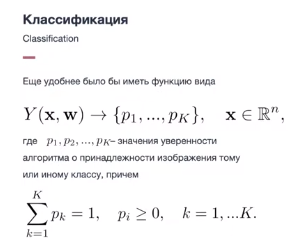

Мы стремимся к тому, чтобы наш алгоритм возвращал не только номер класса, а вектор уверенности, сумма элементов которого равна единице и все компоненты неотрицательны. Для этого мы используем функцию Softmax.

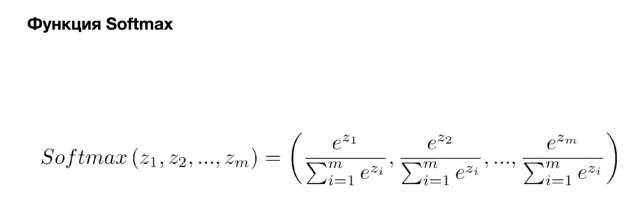

Таким образом, наш алгоритм логистической регрессии выглядит следующим образом.

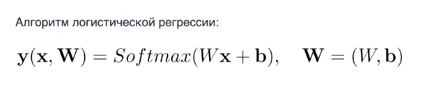

Теперь возникает вопрос: какая должна быть у этого алгоритма целевая функция?

$$E(W)=?$$